## Waste Volume and Recycling Rates Over Time and its Relation to Population

#### Setup

In [181]:
#Import Dependencies
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#### Waste Generation Data Import and Setup

In [182]:
#read excel
recycling_read = pd.read_excel('Resources/MATERIALS_MUNICIPAL_WASTE_STREAM_1960_TO_2015.XLSX')
recycling_excel = pd.ExcelFile('Resources/MATERIALS_MUNICIPAL_WASTE_STREAM_1960_TO_2015.XLSX')
recycling_excel.sheet_names

['Materials generated',
 'Materials recycled',
 'Material combusted',
 'Materials landfilled',
 'Products generated durable good',
 'Products recycled durable good',
 'Products combusted durable good',
 'Products landfill durable good',
 'Products generated nondurable',
 'Products recycled nondurable',
 'Products combusted nondurable',
 'Products landfilled nondurable',
 'Products generated contain&pkg',
 'Products recycled contain&pkg',
 'Products combusted contain&pkg',
 'Products landfilled contain&pkg']

In [288]:
#create dataframes for data on each sheet
#Materials
generated_mat_df = pd.read_excel('Resources/MATERIALS_MUNICIPAL_WASTE_STREAM_1960_TO_2015.XLSX', sheet_name = 'Materials generated', index_col = 0)
recycled_mat_df = pd.read_excel('Resources/MATERIALS_MUNICIPAL_WASTE_STREAM_1960_TO_2015.XLSX', sheet_name = 'Materials recycled', index_col = 0)
combusted_mat_df = pd.read_excel('Resources/MATERIALS_MUNICIPAL_WASTE_STREAM_1960_TO_2015.XLSX', sheet_name = 'Material combusted', index_col = 0)
landfilled_mat_df = pd.read_excel('Resources/MATERIALS_MUNICIPAL_WASTE_STREAM_1960_TO_2015.XLSX', sheet_name = 'Materials landfilled', index_col = 0)
#Durable Good Products
generated_prod_dg_df = pd.read_excel('Resources/MATERIALS_MUNICIPAL_WASTE_STREAM_1960_TO_2015.XLSX', sheet_name = 'Products generated durable good', index_col = 0)
recycled_prod_dg_df = pd.read_excel('Resources/MATERIALS_MUNICIPAL_WASTE_STREAM_1960_TO_2015.XLSX', sheet_name = 'Products recycled durable good', index_col = 0)
combusted_prod_dg_df = pd.read_excel('Resources/MATERIALS_MUNICIPAL_WASTE_STREAM_1960_TO_2015.XLSX', sheet_name = 'Products combusted durable good', index_col = 0)
landfill_prod_dg_df = pd.read_excel('Resources/MATERIALS_MUNICIPAL_WASTE_STREAM_1960_TO_2015.XLSX', sheet_name = 'Products landfill durable good', index_col = 0)
#NonDurable Products
generated_prod_nd_df = pd.read_excel('Resources/MATERIALS_MUNICIPAL_WASTE_STREAM_1960_TO_2015.XLSX', sheet_name = 'Products generated nondurable', index_col = 0)
recycled_prod_nd_df = pd.read_excel('Resources/MATERIALS_MUNICIPAL_WASTE_STREAM_1960_TO_2015.XLSX', sheet_name = 'Products recycled nondurable', index_col = 0)
combusted_prod_nd_df = pd.read_excel('Resources/MATERIALS_MUNICIPAL_WASTE_STREAM_1960_TO_2015.XLSX', sheet_name = 'Products combusted nondurable', index_col = 0)
landfill_prod_nd_df = pd.read_excel('Resources/MATERIALS_MUNICIPAL_WASTE_STREAM_1960_TO_2015.XLSX', sheet_name = 'Products landfilled nondurable', index_col = 0)
#Containers and Packaging
generated_prod_cont_df = pd.read_excel('Resources/MATERIALS_MUNICIPAL_WASTE_STREAM_1960_TO_2015.XLSX', sheet_name = 'Products generated contain&pkg', index_col = 0)
recycled_prod_cont_df = pd.read_excel('Resources/MATERIALS_MUNICIPAL_WASTE_STREAM_1960_TO_2015.XLSX', sheet_name = 'Products recycled contain&pkg', index_col = 0)
combusted_prod_cont_df = pd.read_excel('Resources/MATERIALS_MUNICIPAL_WASTE_STREAM_1960_TO_2015.XLSX', sheet_name = 'Products combusted contain&pkg', index_col = 0)
landfill_prod_cont_df = pd.read_excel('Resources/MATERIALS_MUNICIPAL_WASTE_STREAM_1960_TO_2015.XLSX', sheet_name = 'Products landfilled contain&pkg', index_col = 0)

In [270]:
generated_prod_cont_df.head()

,1960,1970,1980,1990,2000,2005,2010,2011,2012,2013,2014,2015
Products,,,,,,,,,,,,
Products – Durable goods,9920000.0,14660000.0,21800000.0,29810000.0,38870000.0,45060000.0,49350000.0,50370000.0,50890000.0,52900000.0,53040000.0,54150000.0
Products – Nondurable goods,17330000.0,25060000.0,34420000.0,52170000.0,64010000.0,63650000.0,53250000.0,52370000.0,51880000.0,51610000.0,51910000.0,51920000.0
Products – Containers and Packaging – Glass Packaging – Beer and Soft Drink Bottles,1400000.0,5580000.0,6740000.0,5640000.0,5710000.0,6540000.0,5670000.0,5530000.0,5580000.0,5420000.0,5370000.0,5320000.0
Products – Containers and Packaging – Glass Packaging – Wine and Liquor Bottles,1080000.0,1900000.0,2450000.0,2030000.0,1910000.0,1630000.0,1700000.0,1770000.0,1820000.0,1740000.0,1790000.0,1810000.0
Products – Containers and Packaging – Glass Packaging – Other Bottles and Jars,3710000.0,4440000.0,4780000.0,4160000.0,3420000.0,2290000.0,1990000.0,2000000.0,2000000.0,2100000.0,2040000.0,1990000.0


In [271]:
generated_mat_df.columns

Index(['1960', '1970', '1980', '1990', '2000', '2005',   2010,   2011,   2012,
         2013,   2014,   2015],
      dtype='object')

In [272]:
#drop rows with NA values, update str column names to int, remove last row, sum data by year, filter years
def get_sheet_total(dataframe):
    dataframe.dropna(how = 'any', inplace = True)
    dataframe = dataframe.rename(columns = {'1960': 1960, '1970': 1970, '1980': 1980
                                         , '1990': 1990, '2000': 2000, '2005': 2005})
    dataframe.drop(dataframe.index[len(dataframe.index) - 1], inplace = True)
    sum_data = dataframe.sum(axis = 0)
    valid_years = ['1960', '1970', '1980', '1990'
               , '2000', '2010']
    year_filter = sum_data.index.isin(valid_years)
    filtered_sum = sum_data[year_filter]
    return filtered_sum

#### Total Generated Material

In [290]:
#get totals generated for all material types
material_total = get_sheet_total(generated_mat_df)
durable_goods_total = get_sheet_total(generated_prod_dg_df)
non_durable_goods_total = get_sheet_total(generated_prod_nd_df)
packaging_container_total = get_sheet_total(generated_prod_cont_df)

In [291]:
total_generated = pd.DataFrame({'Materials (Tons)': material_total
                                , 'Durable Goods (Tons)': durable_goods_total
                                , 'Non Durable Goods (Tons)': non_durable_goods_total
                                , 'Packaging/Containers (Tons)': packaging_container_total})
total_generated['Total Waste Generated (Tons)'] = total_generated.sum(axis = 1)
total_generated['% Change'] = total_generated['Total Waste Generated (Tons)'].pct_change().map('{:.2%}'.format)
total_generated['% Materials'] = total_generated['Materials (Tons)'] / total_generated['Total Waste Generated (Tons)']
total_generated['% Non Durable Goods'] = total_generated['Non Durable Goods (Tons)'] / total_generated['Total Waste Generated (Tons)']
total_generated['% Durable Goods'] = total_generated['Durable Goods (Tons)'] / total_generated['Total Waste Generated (Tons)']
total_generated['% Packaging/Containers'] = total_generated['Packaging/Containers (Tons)'] / total_generated['Total Waste Generated (Tons)']




In [292]:
total_generated

,Materials (Tons),Durable Goods (Tons),Non Durable Goods (Tons),Packaging/Containers (Tons),Total Waste Generated (Tons),% Change,% Materials,% Non Durable Goods,% Durable Goods,% Packaging/Containers
1960,187060000.0,186160000.0,168830000.0,235640000.0,7.776900e+08,nan%,0.240533,0.217092,0.239376,0.303000
1970,255950000.0,256780000.0,242780000.0,335680000.0,1.091190e+09,40.31%,0.234560,0.222491,0.235321,0.307627
1980,318790000.0,325080000.0,312620000.0,413820000.0,1.370310e+09,25.58%,0.232641,0.228138,0.237231,0.301990
1990,433090000.0,446350000.0,432890000.0,545940000.0,1.858270e+09,35.61%,0.233061,0.232953,0.240197,0.293789
2000,505840000.0,542170000.0,518450000.0,639460000.0,2.205920e+09,18.71%,0.229310,0.235027,0.245780,0.289884
2010,524550000.0,572260000.0,506060000.0,651560000.0,2.254430e+09,2.20%,0.232675,0.224474,0.253838,0.289013


#### Recyled

In [293]:
#get sums for recycled
material_recycled = get_sheet_total(recycled_mat_df)
durable_goods_recycled = get_sheet_total(recycled_prod_dg_df)
non_durable_goods_recycled = get_sheet_total(recycled_prod_nd_df)
packaging_container_recycled = get_sheet_total(recycled_prod_cont_df)

In [294]:
total_recycled = pd.DataFrame({'Materials (Tons)': material_recycled
                               , 'Durable Goods (Tons)': durable_goods_recycled
                               , 'Non Durable Goods (Tons)': non_durable_goods_recycled
                               , 'Packaging/Containers (Tons)': packaging_container_recycled})
total_recycled['Total Waste Recycled (Tons)'] = total_recycled.sum(axis = 1)
total_recycled['% Waste Recycled'] = total_recycled['Total Waste Recycled (Tons)'] / total_generated['Total Waste Generated (Tons)']
total_recycled['% Materials'] = total_recycled['Materials (Tons)'] / total_recycled['Total Waste Recycled (Tons)'] 
total_recycled['% Durable Goods'] = total_recycled['Durable Goods (Tons)'] / total_recycled['Total Waste Recycled (Tons)'] 
total_recycled['% Non Durable Goods'] = total_recycled['Non Durable Goods (Tons)'] / total_recycled['Total Waste Recycled (Tons)']
total_recycled['% Packaging/Containers'] = total_recycled['Packaging/Containers (Tons)'] / total_recycled['Total Waste Recycled (Tons)']





In [295]:
total_recycled

,Materials (Tons),Durable Goods (Tons),Non Durable Goods (Tons),Packaging/Containers (Tons),Total Waste Recycled (Tons),% Waste Recycled,% Materials,% Durable Goods,% Non Durable Goods,% Packaging/Containers
1960,11270000.0,11570000.0,14130000.0,17180000.0,54150000.0,0.069629,0.208126,0.213666,0.260942,0.317267
1970,16520000.0,16980000.0,21190000.0,23090000.0,77780000.0,0.071280,0.212394,0.218308,0.272435,0.296863
1980,30260000.0,30400000.0,35210000.0,46840000.0,142710000.0,0.104144,0.212038,0.213019,0.246724,0.328218
1990,70450000.0,69940000.0,74080000.0,100450000.0,314920000.0,0.169469,0.223708,0.222088,0.235234,0.318970
2000,145520000.0,146450000.0,147710000.0,196000000.0,635680000.0,0.288170,0.228920,0.230383,0.232365,0.308331
2010,178780000.0,181380000.0,169880000.0,241940000.0,771980000.0,0.342428,0.231586,0.234954,0.220058,0.313402


In [296]:
# % Recycled by category
percent_recycled = pd.DataFrame({'% Materials Recyled': total_recycled['Materials (Tons)'] / total_generated['Materials (Tons)']
                                 , '% Durable Goods Reycled': total_recycled['Durable Goods (Tons)'] / total_generated['Durable Goods (Tons)']
                                 , '% Non Durable Goods Recycled': total_recycled['Non Durable Goods (Tons)']/ total_generated['Non Durable Goods (Tons)']
                                 , '% Packaging/Containers Recycled': total_recycled['Packaging/Containers (Tons)'] / total_generated['Packaging/Containers (Tons)']})



In [297]:
percent_recycled

,% Materials Recyled,% Durable Goods Reycled,% Non Durable Goods Recycled,% Packaging/Containers Recycled
1960,0.060248,0.062151,0.083694,0.072908
1970,0.064544,0.066127,0.087281,0.068786
1980,0.094921,0.093515,0.112629,0.113189
1990,0.162668,0.156693,0.171129,0.183995
2000,0.287680,0.270118,0.284907,0.306509
2010,0.340825,0.316954,0.335691,0.371324


#### Combusted

In [298]:
#get sums for combusted
material_combusted = get_sheet_total(combusted_mat_df)
durable_goods_combusted = get_sheet_total(combusted_prod_dg_df)
non_durable_goods_combusted = get_sheet_total(combusted_prod_nd_df)
packaging_container_combusted = get_sheet_total(combusted_prod_cont_df)

In [313]:
total_combusted = pd.DataFrame({'Materials (Tons)': material_combusted
                               , 'Durable Goods (Tons)': durable_goods_combusted
                               , 'Non Durable Goods (Tons)': non_durable_goods_combusted})
total_combusted['Total Waste Combusted (Tons)'] = total_combusted.sum(axis = 1)
total_combusted['% Waste Combusted'] = total_combusted['Total Waste Combusted (Tons)'] / total_generated['Total Waste Generated (Tons)']
total_combusted['% Materials'] = total_combusted['Materials (Tons)'] / total_combusted['Total Waste Combusted (Tons)']
total_combusted['% Durable Goods'] = total_combusted['Durable Goods (Tons)'] / total_combusted['Total Waste Combusted (Tons)']
total_combusted['Non Durable Goods'] = total_combusted['Non Durable Goods (Tons)'] / total_combusted['Total Waste Combusted (Tons)']


In [314]:
total_combusted

,Materials (Tons),Durable Goods (Tons),Non Durable Goods (Tons),Total Waste Combusted (Tons),% Waste Combusted,% Materials,% Durable Goods,Non Durable Goods
1960,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN
1970,960000.0,960000.0,890000.0,2810000.0,0.002575,0.341637,0.341637,0.316726
1980,5820000.0,5960000.0,5560000.0,17340000.0,0.012654,0.335640,0.343714,0.320646
1990,61570000.0,64000000.0,61110000.0,186680000.0,0.100459,0.329816,0.342833,0.327352
2000,69510000.0,73720000.0,71970000.0,215200000.0,0.097556,0.323002,0.342565,0.334433
2010,60930000.0,65690000.0,55310000.0,181930000.0,0.080699,0.334909,0.361073,0.304018


#### Landfill

In [301]:
#Get Sums for Landfill
material_landfill = get_sheet_total(landfilled_mat_df)
durable_goods_landfill = get_sheet_total(landfill_prod_dg_df)
non_durable_goods_landfill = get_sheet_total(landfill_prod_nd_df)
packaging_container_landfill = get_sheet_total(landfill_prod_cont_df)

In [302]:
total_landfill_df = pd.DataFrame({'Materials (Tons)': material_landfill
                               , 'Durable Goods (Tons)': durable_goods_landfill
                               , 'Non Durable Goods (Tons)': non_durable_goods_landfill
                               , 'Packaging/Containers (Tons)': packaging_container_landfill})
total_landfill_df['Total Waste Landfilled (Tons)'] = total_landfill_df.sum(axis = 1)
total_landfill_df['% Waste Landfilled'] = total_landfill_df['Total Waste Landfilled (Tons)'] / total_generated['Total Waste Generated (Tons)']

In [303]:
total_landfill_df

,Materials (Tons),Durable Goods (Tons),Non Durable Goods (Tons),Packaging/Containers (Tons),Total Waste Landfilled (Tons),% Waste Landfilled
1960,175790000.0,174590000.0,154700000.0,218460000.0,7.235400e+08,0.930371
1970,238470000.0,238840000.0,220700000.0,311370000.0,1.009380e+09,0.925027
1980,282710000.0,288720000.0,271850000.0,359610000.0,1.202890e+09,0.877823
1990,301070000.0,312410000.0,298260000.0,369760000.0,1.281500e+09,0.689620
2000,290810000.0,306550000.0,299330000.0,357480000.0,1.254170e+09,0.568547
2010,284840000.0,305510000.0,257180000.0,330020000.0,1.177550e+09,0.522327


#### Look at packaging and container types

In [304]:
# Drop rows with null values, update columns to all ints, sum data by year
def find_material(dataframe, material):
    dataframe.dropna(how = 'any', inplace = True)
    dataframe = dataframe.rename(columns = {'1960': 1960, '1970': 1970, '1980': 1980
                                         , '1990': 1990, '2000': 2000, '2005': 2005})
    material_df = dataframe[dataframe.index.str.contains(material)]
    material_sum_df = material_df.sum(axis = 0)
    valid_years = ['1960', '1970', '1980', '1990'
               , '2000', '2010']
    year_filter = material_sum_df.index.isin(valid_years)
    material_filtered = material_sum_df[year_filter]
    return material_filtered

In [305]:
glass_material = find_material(generated_prod_cont_df, 'Glass')
plastic_material = find_material(generated_prod_cont_df, 'Plastic')
steel_material = find_material(generated_prod_cont_df, 'Steel')
aluminum_material = find_material(generated_prod_cont_df, 'Aluminum')
paperboard_material = find_material(generated_prod_cont_df, 'Paperboard')

glass_recycled = find_material(recycled_prod_cont_df, 'Glass')
plastic_recycled = find_material(recycled_prod_cont_df, 'Plastic')
steel_recycled = find_material(recycled_prod_cont_df, 'Steel')
aluminum_recycled = find_material(recycled_prod_cont_df, 'Aluminum')
paperboard_recycled = find_material(recycled_prod_cont_df, 'Paperboard')

In [306]:
col_list = ['Glass Total', 'Plastic Total', 'Aluminum Total', 'Steel Total', 'Paperboard Total']
container_df = pd.DataFrame({'Glass Total': glass_material, '% Glass Recycled': glass_recycled / glass_material
                             , 'Plastic Total': plastic_material, '% Plastic Recycled': plastic_recycled / plastic_material
                             , 'Steel Total': steel_material, '% Steel Recycled': steel_recycled / steel_material
                             , 'Aluminum Total': aluminum_material, '% Aluminum Recycled': aluminum_recycled / aluminum_material
                             , 'Paperboard Total': paperboard_material, '% Paperboard Recycled': paperboard_recycled / paperboard_material})
                             
container_df['Container Total'] = container_df[col_list].sum(axis = 1)
container_df['% Glass'] = container_df['Glass Total'] / container_df['Container Total']
container_df['% Plastic'] = plastic_material / container_df['Container Total']
container_df['% Steel'] = steel_material / container_df['Container Total']
container_df['% Aluminum'] = aluminum_material / container_df['Container Total']
container_df['% Paperboard'] = paperboard_material / container_df['Container Total']

In [307]:
container_df

,Glass Total,% Glass Recycled,Plastic Total,% Plastic Recycled,Steel Total,% Steel Recycled,Aluminum Total,% Aluminum Recycled,Paperboard Total,% Paperboard Recycled,Container Total,% Glass,% Plastic,% Steel,% Aluminum,% Paperboard
1960,12380000.0,0.016155,240000.0,0.000000,9320000.0,0.006438,340000.0,0.000000,35000000.0,0.162857,57280000.0,0.216131,0.004190,0.162709,0.005936,0.611034
1970,23840000.0,0.012584,4180000.0,0.000000,10760000.0,0.014870,1140000.0,0.017544,51440000.0,0.127722,91360000.0,0.260946,0.045753,0.117776,0.012478,0.563047
1980,27940000.0,0.053686,6800000.0,0.002941,7220000.0,0.055402,2540000.0,0.251969,61970000.0,0.245925,106470000.0,0.262421,0.063868,0.067813,0.023856,0.582042
1990,23660000.0,0.221471,13800000.0,0.037681,5780000.0,0.238754,3800000.0,0.531579,74030000.0,0.333378,121070000.0,0.195424,0.113984,0.047741,0.031387,0.611464
2000,22080000.0,0.260870,22380000.0,0.092046,5740000.0,0.588850,3900000.0,0.441026,89610000.0,0.477514,143710000.0,0.153643,0.155730,0.039942,0.027138,0.623547
2010,18720000.0,0.334402,27360000.0,0.135234,5480000.0,0.689781,3800000.0,0.357895,83990000.0,0.639362,139350000.0,0.134338,0.196340,0.039325,0.027269,0.602727


#### Import and set up US Population Data

In [308]:
#Import Data table from website, set headers as 1st row in table
web_data = pd.read_html('https://www.multpl.com/united-states-population/table/by-year', header = 0, index_col = 0)
census_df = web_data[0]
census_df.rename(index = str, columns = {'Date': 'Date', 'Value Value': 'Population'}, inplace = True)

In [204]:
#Change Date column to date, Population column to int
census_df['Population'] = census_df['Population'].str.replace(' million','').astype(float) * 1000000
census_df.index = pd.to_datetime(census_df.index).year


In [205]:
#Find relevant year
valid_years = ['1960', '1970', '1980', '1990'
               , '2000', '2010']
year_filter = census_df.index.isin(valid_years)

census_yr_filter_df = census_df[year_filter].sort_values(['Population']) 
census_yr_filter_df['%change'] = census_yr_filter_df.pct_change()
census_yr_filter_df

,Population,%change
Date,,
1960,180670000.0,NaN
1970,205050000.0,0.134942
1980,227220000.0,0.108120
1990,249620000.0,0.098583
2000,282160000.0,0.130358
2010,309340000.0,0.096328


In [206]:
#find average tons waste/person
pop_waste_df = pd.DataFrame({'Waste/Person (Tons)': total_generated['Total Waste Generated (Tons)'] / census_yr_filter_df['Population']})
pop_waste_df


,Waste/Person (Tons)
1960,4.304478
1970,5.321580
1980,6.030763
1990,7.444395
2000,7.817976
2010,7.287871


#### GDP

In [207]:
#Import Data table from website, set headers as 1st row in table
gdp_web_data = pd.read_html('https://www.thebalance.com/us-gdp-by-year-3305543', index_col = 0)
gdp_df = gdp_web_data[0]

In [208]:
gdp_year_filter = gdp_df.index.isin(valid_years)
gdp_year_filtered_df = gdp_df[gdp_year_filter]
gdp_year_filtered_df['Real GDP (trillions)'] = gdp_year_filtered_df['Real GDP (trillions)'].str.replace('$','').astype(float) * 100000000
gdp_year_filtered_df['% Change'] = gdp_year_filtered_df['Real GDP (trillions)'].pct_change().map('{:.2%}'.format)
gdp_year_filtered_df

/Users/hilarywall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hilarywall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Nominal GDP (trillions),Real GDP (trillions),GDP Growth Rate,Events Affecting GDP,% Change
Year,,,,,
1960,$0.542,3.260000e+08,2.6%,Recession.,nan%
1970,$1.073,4.951000e+08,0.2%,Recession.,51.87%
1980,$2.857,6.759000e+08,-0.3%,Recession.,36.52%
1990,$5.963,9.366000e+08,1.9%,Recession.,38.57%
2000,$10.252,1.313100e+09,4.1%,Tech bubble burst.,40.20%
2010,$14.992,1.559900e+09,2.6%,ACA. Dodd-Frank.,18.80%


In [209]:
gdp_year_filtered_df['Real GDP (trillions)'].tolist()

[326000000.0,
 495099999.99999994,
 675900000.0,
 936600000.0,
 1313100000.0,
 1559900000.0]

#### Set up charts

In [232]:
%matplotlib notebook

In [233]:
# Import our dependencies
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


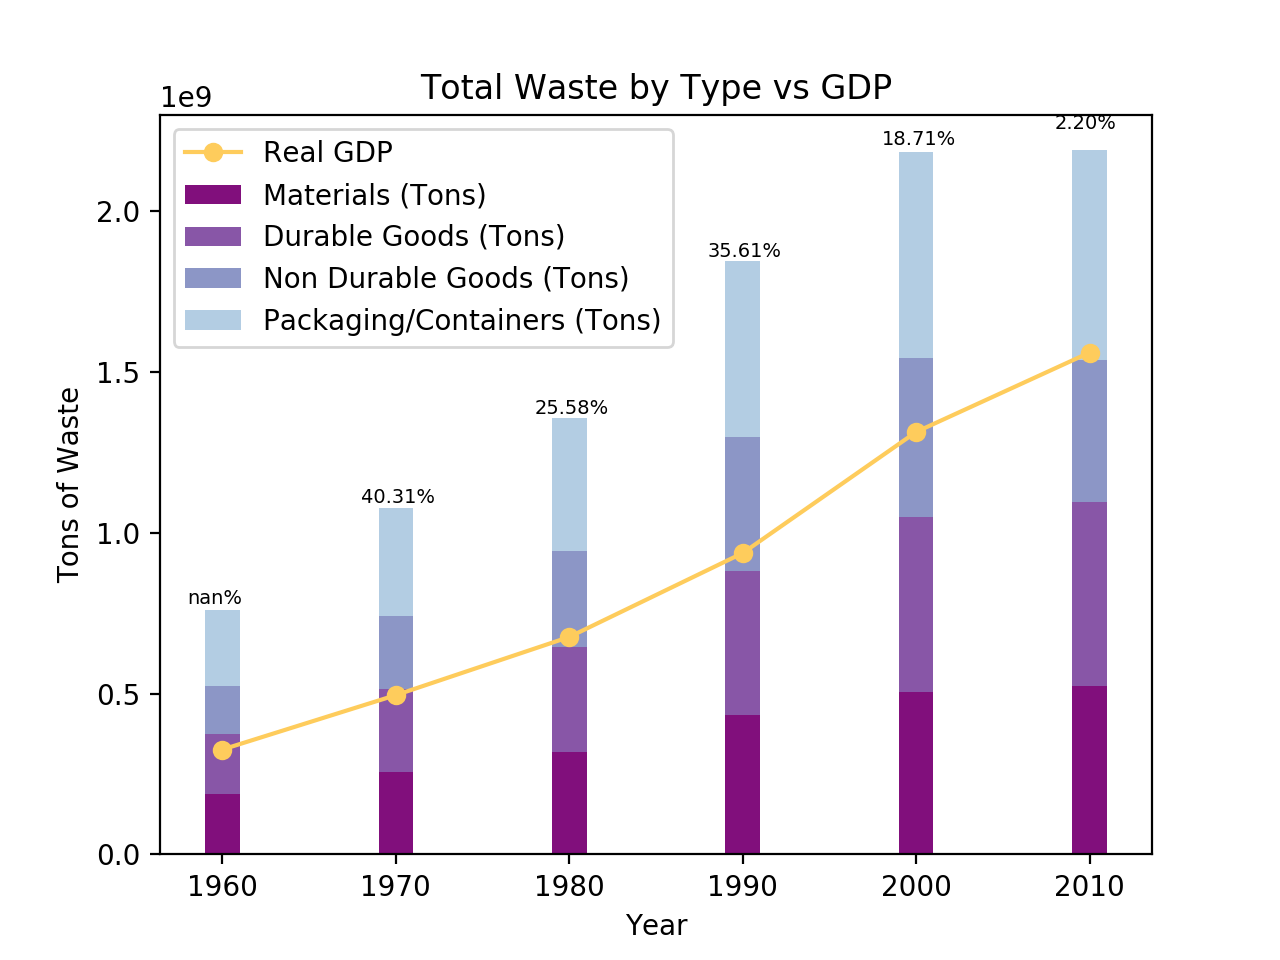

In [237]:
x_axis = total_generated.index

p1 = plt.bar(x_axis, total_generated['Materials (Tons)'], width = 2, color = '#810f7c', label = 'Materials (Tons)')
p2 = plt.bar(x_axis, total_generated['Durable Goods (Tons)'], width = 2, bottom = total_generated['Materials (Tons)'], color = '#8856a7', label = 'Durable Goods (Tons)')
p3 = plt.bar(x_axis, total_generated['Non Durable Goods (Tons)'], width = 2, bottom = total_generated['Durable Goods (Tons)'] + total_generated['Materials (Tons)'], color = '#8c96c6', label = 'Non Durable Goods (Tons)')
p4 = plt.bar(x_axis, total_generated['Packaging/Containers (Tons)'], width = 2, bottom = total_generated['Non Durable Goods (Tons)'] + total_generated['Materials (Tons)'] + total_generated['Non Durable Goods (Tons)'], color = '#b3cde3', label = 'Packaging/Containers (Tons)')
p5 = plt.plot(x_axis, gdp_year_filtered_df['Real GDP (trillions)'], marker = 'o', color = '#fecc5c', label = 'Real GDP')

y_value = total_generated['Total Waste Generated (Tons)']

for x,y, change in zip(x_axis, y_value, total_generated['% Change']): 
    plt.text(x - 2, y + 2, change, fontsize = 7)

plt.legend()
plt.title('Total Waste by Type vs GDP')
plt.xlabel('Year')
plt.ylabel('Tons of Waste')
plt.savefig('./waste_type.png')

plt.show()


In [255]:
%matplotlib notebook

In [256]:
# Import our dependencies
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


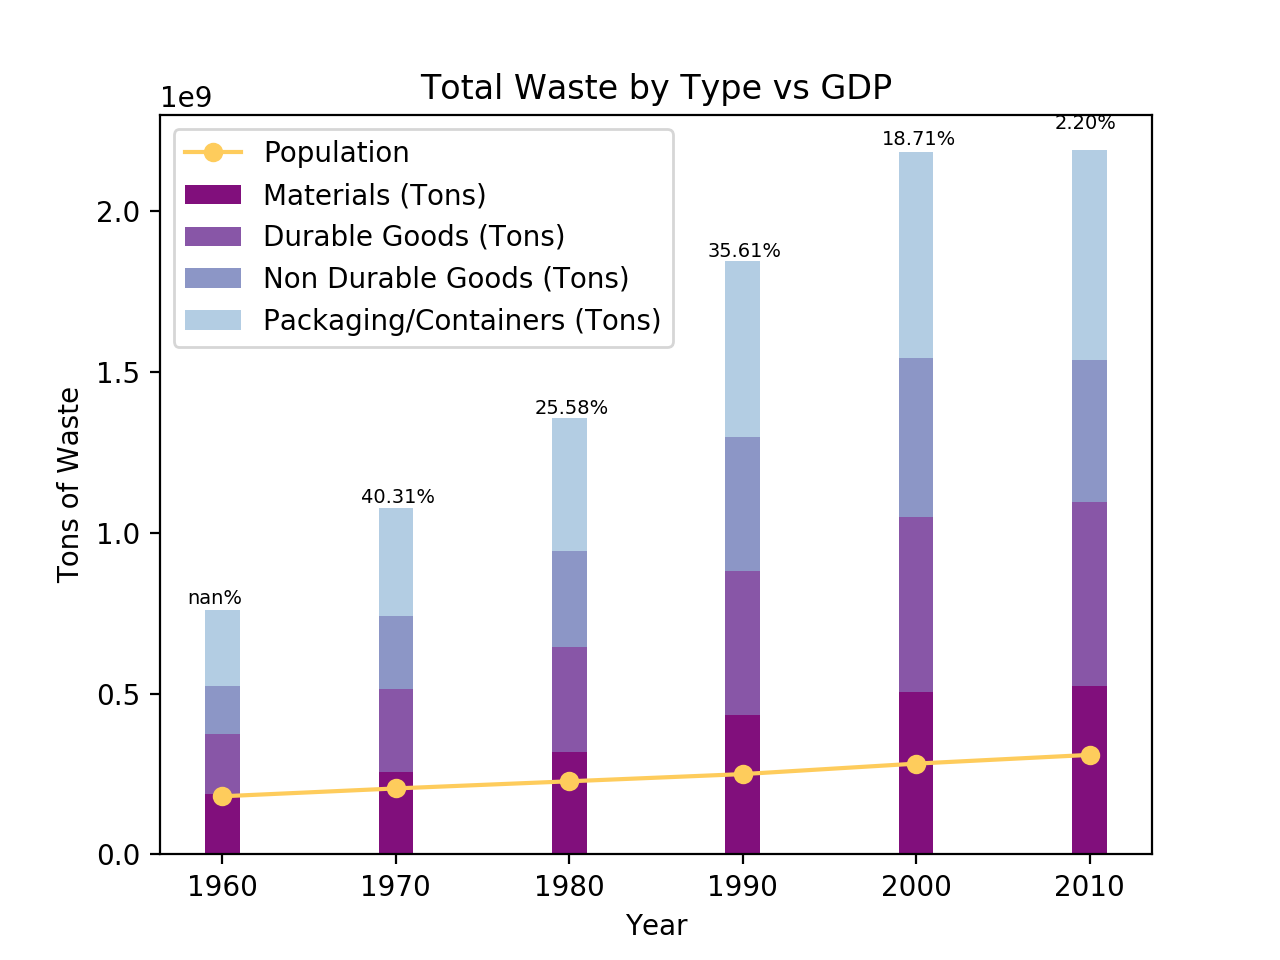

In [257]:
x_axis = total_generated.index

p6 = plt.bar(x_axis, total_generated['Materials (Tons)'], width = 2, color = '#810f7c', label = 'Materials (Tons)')
p7 = plt.bar(x_axis, total_generated['Durable Goods (Tons)'], width = 2, bottom = total_generated['Materials (Tons)'], color = '#8856a7', label = 'Durable Goods (Tons)')
p8 = plt.bar(x_axis, total_generated['Non Durable Goods (Tons)'], width = 2, bottom = total_generated['Durable Goods (Tons)'] + total_generated['Materials (Tons)'], color = '#8c96c6', label = 'Non Durable Goods (Tons)')
p9 = plt.bar(x_axis, total_generated['Packaging/Containers (Tons)'], width = 2, bottom = total_generated['Non Durable Goods (Tons)'] + total_generated['Materials (Tons)'] + total_generated['Non Durable Goods (Tons)'], color = '#b3cde3', label = 'Packaging/Containers (Tons)')
p10 = plt.plot(x_axis, census_yr_filter_df['Population'], marker = 'o', color = '#fecc5c', label = 'Population')

y_value = total_generated['Total Waste Generated (Tons)']

for x,y, change in zip(x_axis, y_value, total_generated['% Change']): 
    plt.text(x - 2, y + 2, change, fontsize = 7)

plt.legend()
plt.title('Total Waste by Type vs GDP')
plt.xlabel('Year')
plt.ylabel('Tons of Waste')
plt.savefig('./waste_type.png')

plt.show()

In [238]:
%matplotlib notebook

In [239]:
# Import our dependencies
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


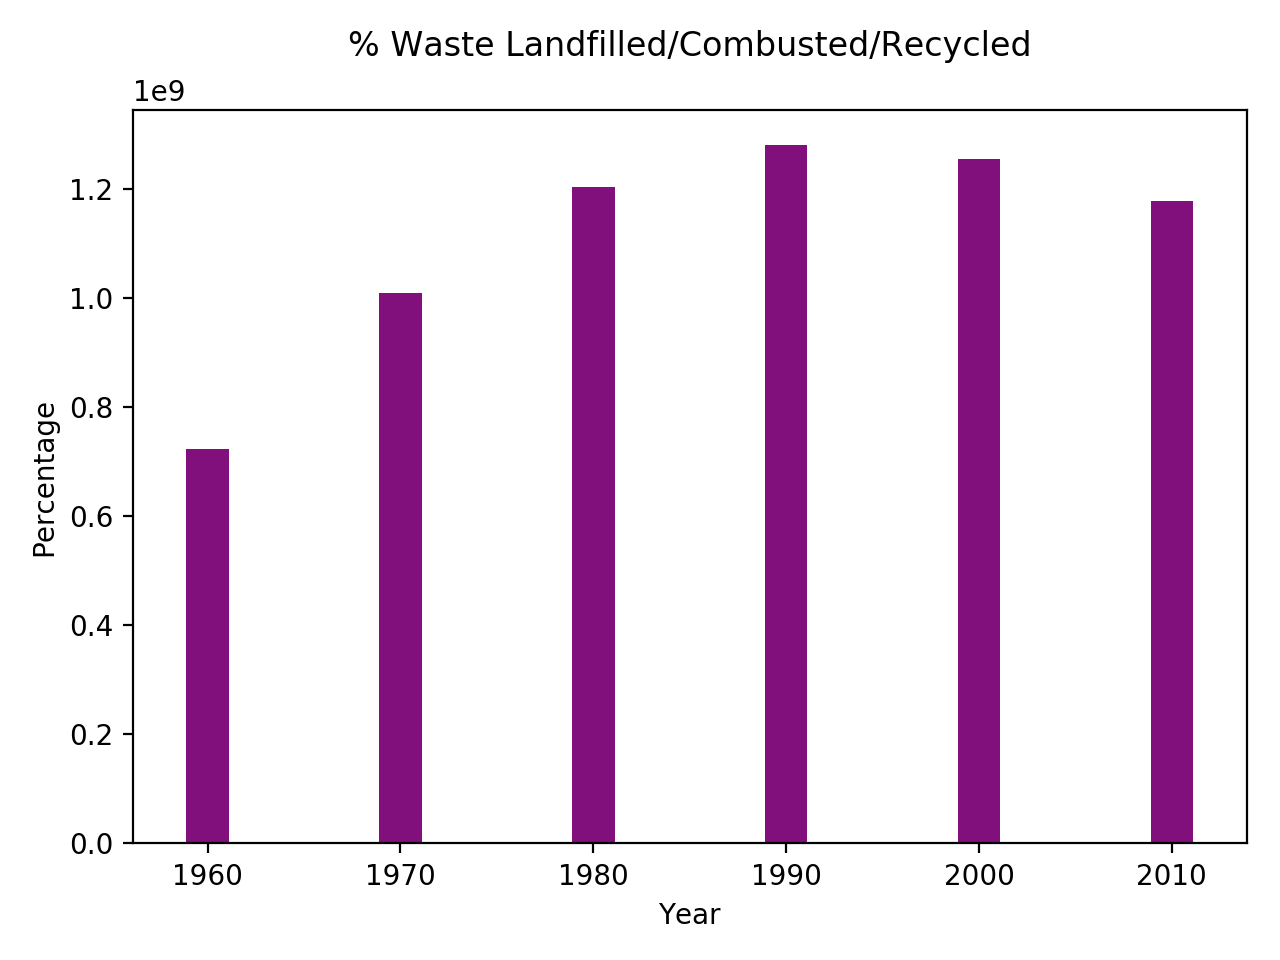

In [240]:
#Total Landfill Material

plt.bar(x_axis, total_landfill_df['Total Waste Landfilled (Tons)'], width = 2.2, color = '#810f7c')

plt.title('Total Waste Landfilled', y = 1.05)
plt.xlabel('Year')
plt.ylabel('Tons of Waste')

plt.savefig('./total_waste_landfilled.png')
plt.show()

In [310]:
%matplotlib notebook

In [311]:
# Import our dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<IPython.core.display.Javascript object>


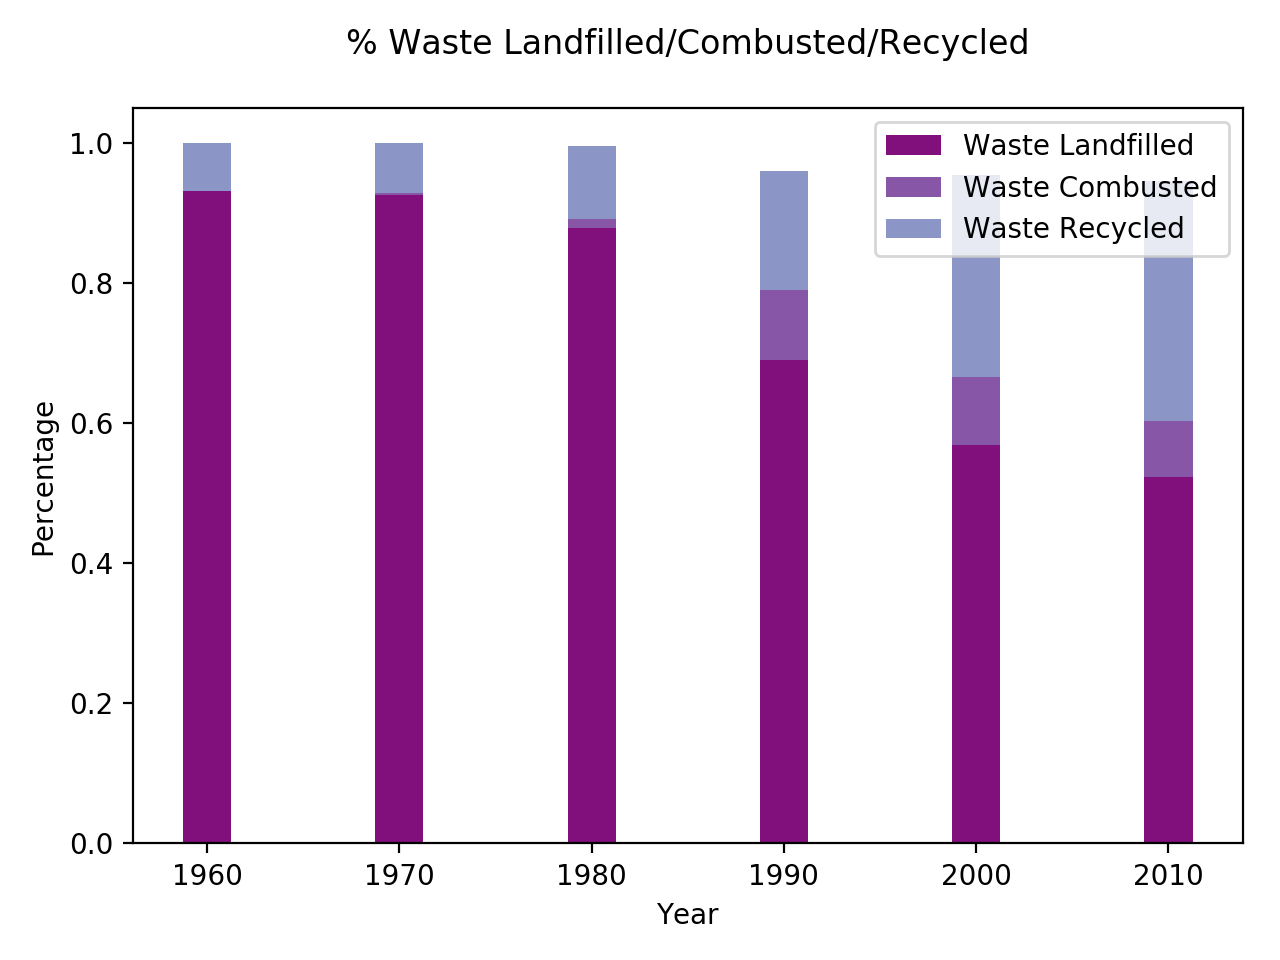

In [315]:
# Waste processing type
pp1 = plt.bar(x_axis, total_landfill_df['% Waste Landfilled'], width = 2.5, color = '#810f7c', label = 'Waste Landfilled')
pp2 = plt.bar(x_axis, total_combusted['% Waste Combusted'], width = 2.5, bottom = total_landfill_df['% Waste Landfilled'], color = '#8856a7', label = 'Waste Combusted')
pp3 = plt.bar(x_axis, total_recycled['% Waste Recycled'], width = 2.5, bottom = total_combusted['% Waste Combusted'] + total_landfill_df['% Waste Landfilled'], color = '#8c96c6', label = 'Waste Recycled')

plt.legend()
plt.title('% Waste Landfilled/Combusted/Recycled', y = 1.05)
plt.xlabel('Year', fontsize = 10)
plt.ylabel('Percentage', fontsize = 10)
plt.tight_layout()

plt.savefig('./waste_process_type.png')
plt.show()

In [250]:
per_chart_waste = plt.plot(x_axis, total_generated['% Change'])
per_chart_pop = plt.plot(x_axis, census_yr_filter_df['%change'])

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [223]:
%matplotlib notebook

In [224]:
# Import our dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<IPython.core.display.Javascript object>


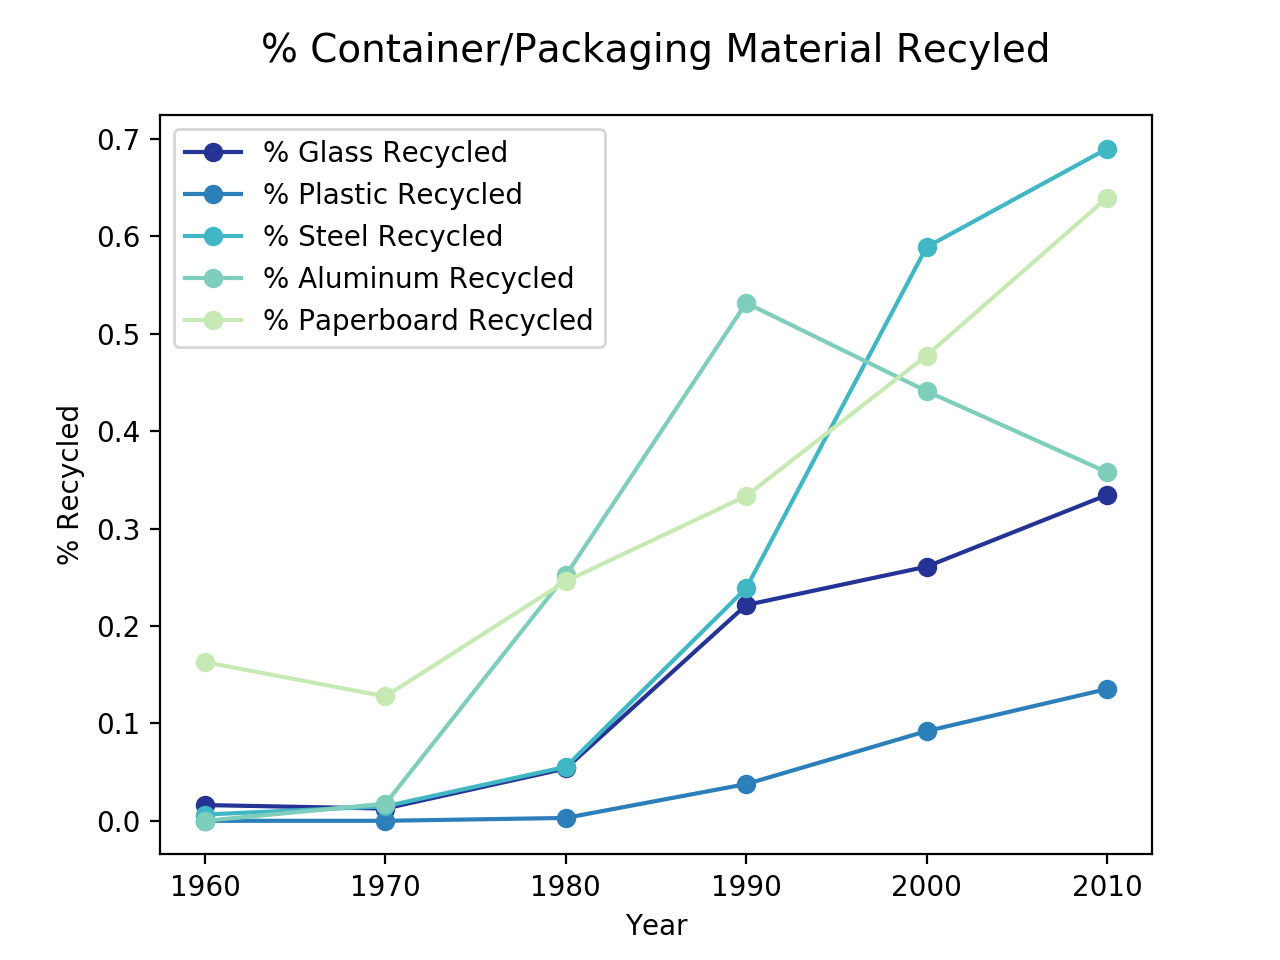

<function matplotlib.pyplot.show(*args, **kw)>

In [225]:
x_axis_cont = container_df.index
#y_labels = np.arange()

plt.plot(x_axis_cont, container_df['% Glass Recycled'], marker = 'o', color = '#253494')
plt.plot(x_axis_cont, container_df['% Plastic Recycled'], marker = 'o', color = '#2c7fb8')
plt.plot(x_axis_cont, container_df['% Steel Recycled'], marker = 'o', color = '#41b6c4')
plt.plot(x_axis_cont, container_df['% Aluminum Recycled'], marker = 'o', color = '#7fcdbb')
plt.plot(x_axis_cont, container_df['% Paperboard Recycled'], marker = 'o', color = '#c7e9b4')

plt.legend()
plt.title('% Container/Packaging Material Recyled', y = 1.05, fontsize = 14)
plt.xlabel('Year')
plt.ylabel('% Recycled')

plt.savefig('./%_material_recycled.png')
plt.show

In [258]:
%matplotlib notebook

In [259]:
# Import our dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<IPython.core.display.Javascript object>


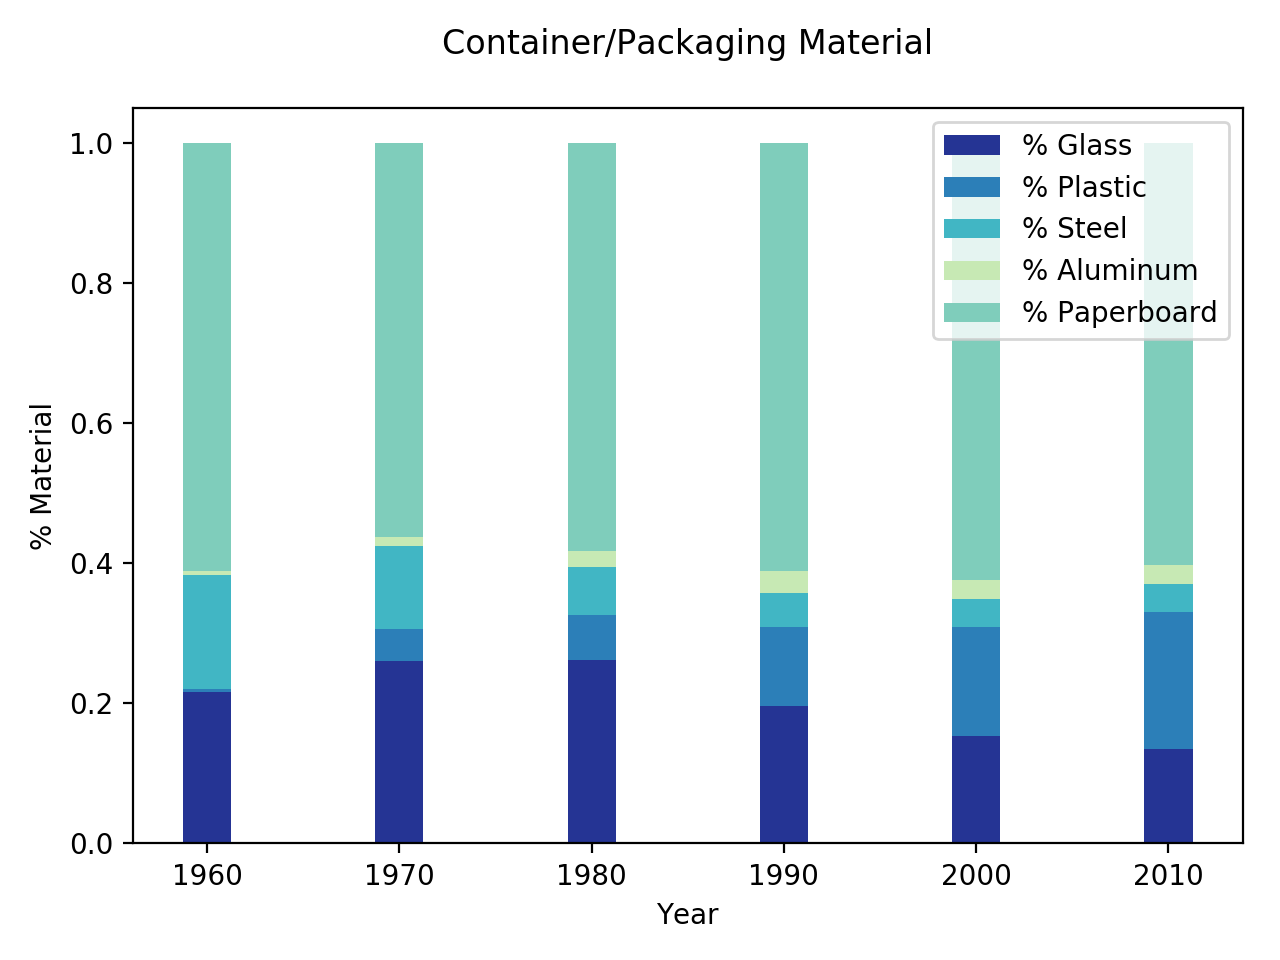

In [260]:
#Breakdown of container material type

pc1 = plt.bar(x_axis_cont, container_df['% Glass'], width = 2.5, color = '#253494', label = '% Glass')
pc2 = plt.bar(x_axis, container_df['% Plastic'], width = 2.5, bottom = container_df['% Glass'], color = '#2c7fb8', label = '% Plastic')
pc3 = plt.bar(x_axis, container_df['% Steel'], width = 2.5, bottom = container_df['% Plastic'] + container_df['% Glass'], color = '#41b6c4', label = '% Steel')
pc4 = plt.bar(x_axis, container_df['% Aluminum'], width = 2.5, bottom = container_df['% Plastic'] + container_df['% Glass'] + container_df['% Steel'], color = '#c7e9b4', label = '% Aluminum')
pc5 = plt.bar(x_axis, container_df['% Paperboard'], width = 2.5, bottom = container_df['% Plastic'] + container_df['% Glass'] + container_df['% Steel'] + container_df['% Aluminum'], color = '#7fcdbb', label = '% Paperboard')

plt.legend()
plt.title('Container/Packaging Material', y = 1.05)
plt.xlabel('Year')
plt.ylabel('% Material')

plt.tight_layout()
plt.savefig('./%_container_material.png')
plt.show()
